# Time of day histograms

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import datetime

from utils import read_data

In [2]:
data = read_data(absolute_times=True)

# For the main histograms we only want the time information
times = np.array([item[0] for sublist in data.values() for item in sublist])

## Plot histograms

First, create our bins:

In [3]:
# There is an outlier at 1am. Mask this out.
times_excluding_dreams = times[times > 30000]

# x-axis start time
start_hour = 8
t = datetime.time(hour=start_hour, minute=0)
x_start = datetime.timedelta(hours=t.hour, minutes=t.minute).total_seconds()

# x-axis end time
end_hour = 17
t = datetime.time(hour=end_hour, minute=0)
x_end = datetime.timedelta(hours=t.hour, minutes=t.minute).total_seconds()

# Half-hour bin widths
bin_width = 30*60

# Manually create our histogram bins
bins = np.arange(x_start, x_end+bin_width, bin_width)

### Plotting a normal histogram of beep times

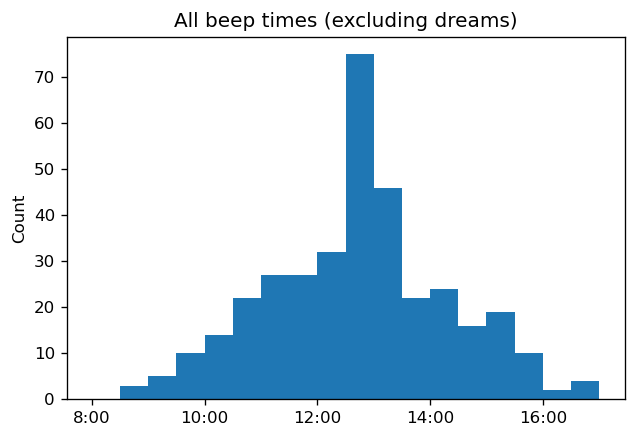

In [4]:
fig, ax = plt.subplots(dpi=120)
ax.set_title('All beep times (excluding dreams)')

ax.hist(times_excluding_dreams, bins=bins)

ax.set_ylabel('Count')

# Modify x-ticks to display readable times (instead of being seconds past
# midnight)
xtick_hours = np.arange(start_hour, end_hour, 2)
xtick_seconds = xtick_hours*60*60
ax.set_xticks(xtick_seconds)
ax.set_xticklabels([f'{int(hour)}:00' for hour in xtick_hours])

fig.savefig('time_of_day_hist.png', facecolor='w', bbox_inches='tight', dpi=180)

### Plotting a circular histogram of beep times

In [5]:
# Use the numpy histogram function to get bins and counts:
hist, _ = np.histogram(times_excluding_dreams, bins=bins)

In [6]:
# Note that bins is one longer than hist because it includes the end value of
# the final bin
len(hist), len(bins)

(18, 19)

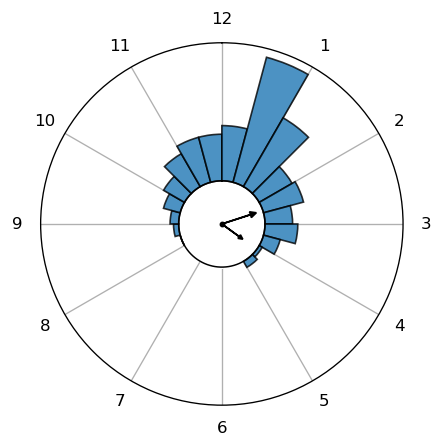

In [7]:
# Convert data to radians
# -----------------------

# We now want to convert all times into radians. i.e. 12:00 is 0 rad, 3:00 is
# pi/2 rad, etc. This function converts number of seconds past midnight to
# radians:
def seconds_to_radians(t):
    return t*(2*np.pi)/(12*60*60)

bins_radians = seconds_to_radians(bins)
bin_width_radians = seconds_to_radians(bin_width)

# Create and format axes
# ----------------------

# Create an axis with polar projection
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, dpi=120)

# Reverse the increasing theta direction to be clockwise
ax.set_theta_direction(-1)

# Set the zero-theta axis to be vertically upwards
ax.set_theta_offset(np.pi/2)

# Create histogram bars
# ---------------------

# Histogram bottom height
bottom = max(hist)/3

bars = ax.bar(
    bins_radians[:-1], 
    hist, 
    width=bin_width_radians, 
    align='edge',
    bottom=bottom)

for bar in bars:
    bar.set_facecolor('C0')
    bar.set_alpha(0.8)
    bar.set_edgecolor('k')
    bar.set_zorder(10)
    
# Plot a clock face 
# -----------------

# Plot a white circle in the middle of the plot using fill_between, and plot
# a black line around the circle edge
thetas = np.linspace(0,2*np.pi,100, endpoint=True)
ax.fill_between(thetas, 0, bottom, color='w', zorder=10)
ax.plot(thetas, bottom*np.ones(len(thetas)), c='k', lw=0.9, zorder=11)

# Get the current time
now = datetime.datetime.now()
now_abs = datetime.timedelta(hours=now.hour, minutes=now.minute).total_seconds()

# Convert the current time to minute and hour hand angles
minute_angle = 2*np.pi*(now_abs/(60*60))
hour_angle = 2*np.pi*(now_abs/(12*60*60))

# Add the minute and hour hands to the plot
ax.arrow(
    minute_angle, 
    0, 
    0, 
    0.7*bottom, 
    width=0.01, 
    head_width=0.2, 
    head_length=(0.7*bottom)/5, 
    zorder=12, 
    fc='k'
    )
ax.arrow(
    hour_angle, 
    0, 
    0, 
    0.5*bottom, 
    width=0.01, 
    head_width=0.2, 
    head_length=(0.5*bottom)/5, 
    zorder=12, 
    fc='k'
    )
ax.plot(0, 0, marker='.', markersize=5, c='k', zorder=12)

# Format ticks
# ------------

ax.set_rticks([])
ax.set_rlim(0)

ax.set_xticks((np.pi/180)*np.arange(0, 331, 30))
ax.set_xticklabels(['12'] + [f'{hour}' for hour in np.arange(1,12)])

fig.savefig('time_of_day_circ_hist.png', facecolor='w', bbox_inches='tight', dpi=180)